In [7]:
import sys
print(sys.version)
import numpy as np
import scipy.io as sio
import os
from PIL import Image
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# pycortex
import cortex
print(np.__version__)

import seaborn as sns
import heapq


3.8.8 (default, Feb 24 2021, 13:46:16) 
[Clang 10.0.0 ]
1.22.4


In [8]:
# Functions

def subjectID2subjectName(subjectID):
    if subjectID is 'DM01':
        subjectName = '20191021S1'
        loadInfoSbID = 0
    elif subjectID is 'DM03':
        subjectName = '20191021S3'
        loadInfoSbID = 1
    elif subjectID is 'DM06':
        subjectName = '20191023S3'
        loadInfoSbID = []
    elif subjectID is 'DM07':
        subjectName = '20191024S1'
        loadInfoSbID = 2
    elif subjectID is 'DM09':
        subjectName = '20191025S1'
        loadInfoSbID = 3
    elif subjectID is 'DM11':
        subjectName = '20191025S2'
        loadInfoSbID = []
        
    elif subjectID is 'MVVMEZ':
        subjectName = '20161216S1'
        loadInfoSbID = 10
    elif subjectID is 'UJEFHB':
        subjectName = '20170828S2'
        loadInfoSbID = 11
    elif subjectID is 'VPQLKC':
        subjectName = '20180404S1'
        loadInfoSbID = 12
    elif subjectID is 'ZCUFTK':
        subjectName = 'RL04'
        loadInfoSbID = 13
    elif subjectID is 'ZFFCFH':
        subjectName = '20180309S1'
        loadInfoSbID = 14
    return subjectName, loadInfoSbID


<>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:16: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:19: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:23: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:26: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:29: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:32: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:35: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:7: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:10: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:13: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:16: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:19: Synta

[0.         0.         0.         ... 0.06262093 0.         0.05108484]
(87969,)
16291
[0.         0.         0.         ... 0.13354488 0.13743876 0.16771419]
(87969,)
9648
[0.         0.         0.         ... 0.13354488 0.13743876 0.16771419]
(87969,)
9648
[0.         0.         0.         ... 0.13354488 0.13743876 0.16771419]
(87969,)
9648
[0.         0.         0.         ... 0.07092395 0.13743876 0.11662935]
(87969,)
8528
1000番目 0.09997944537697998
1000


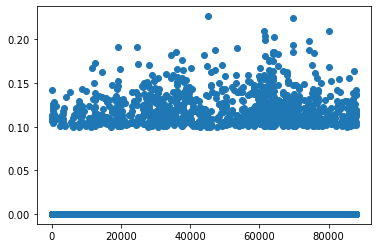

In [20]:
###
### Set 3d result to show flattened cortical map



# SET PARAMETER ::::::::::

dataSetName = 'fs_fullhead' # fs_fullhead (for DM01, DM03,...)

subjectID = 'DM01' # 01, 03, 07, 09
# DM01:20191021S1, DM03:20191021S3, DM06:20191023S3, DM07:20191024S1, DM09:20191025S1, DM11:20191025S2

movname = 'GIS2'; # Set movie title:  DreamGirls, GIS1, GIS2, Glee, Mentalist
resultdir = '/Users/sudou/brain/Ridge_Result';  # Set result directory
loaditemdir = '/Users/sudou/brain' # Set directory storing 'loadItems.mat'
braininfodir = '/Users/sudou/brain/bold' # Set brain-info (maskfile) directory
savedir = '/Users/sudou/brain/fig' # Set save directory

# SET PARAMETER ::::::::::



### Subject Info
subjectName, loadInfoSbID = subjectID2subjectName(subjectID)

### Load results
loadname = '{:s}/話し言葉_dvd_result/{:s}/Banded_{:s}_cls_correlation.npy'.format(resultdir,subjectID, movname);
dt = np.load(loadname);
dt = np.where(dt < 0.0, 0, dt)
#dt = np.where(dt > 0, 1, dt)
dt = np.nan_to_num(dt, nan=0)
print(dt)
print(dt.shape)
print(np.count_nonzero(dt > 0))

loadname1 = '{:s}/話し言葉_dvd_result/{:s}/Banded_{:s}_time_correlation.npy'.format(resultdir,subjectID, movname);
dt1 = np.load(loadname1);
dt1 = np.where(dt1 < 0, 0, dt1)
#dt1 = np.where(dt1 > 0, 1, dt1)
dt1 = np.nan_to_num(dt1, nan=0)
print(dt1)
print(dt1.shape)
print(np.count_nonzero(dt1 > 0))

loadname2 = '{:s}/話し言葉_dvd_result/{:s}/{:s}_correlation.npy'.format(resultdir,subjectID, movname);
dt2 = np.load(loadname1);
dt2 = np.where(dt2 < 0, 0, dt2)
#dt2 = np.where(dt1 > 0, 1, dt1)
dt2 = np.nan_to_num(dt1, nan=0)
print(dt2)
print(dt2.shape)
print(np.count_nonzero(dt2 > 0))

loadname3 = '{:s}/only_dvd_result/{:s}/{:s}_correlation.npy'.format(resultdir,subjectID, movname);
dt3 = np.load(loadname1);
dt3 = np.where(dt3 < 0, 0, dt3)
#dt3 = np.where(dt3 > 0, 1, dt3)
dt3 = np.nan_to_num(dt1, nan=0)
print(dt3)
print(dt3.shape)
print(np.count_nonzero(dt3 > 0))


DT = dt1-dt
DT = np.where(DT < 0.0, 0, DT)
DT = np.nan_to_num(DT, nan=0)


print(DT)
print(DT.shape)
print(np.count_nonzero(DT > 0))

t = sorted(DT)[-1000]
print("1000番目",t)

DT = np.where(DT < t, 0, DT)
#DT = np.where(DT > 0, 1, DT)

x = range((len(DT)))
y = DT
plt.scatter(x, y)

print(np.count_nonzero(DT > 0))


87969
[96 96 72]


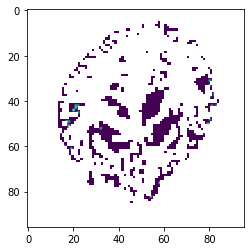

In [21]:

### Reconstruct dt as data with epi size (to show using pycortex)
# load brain info
loadInfoDT = sio.loadmat('{:s}/loadItems.mat'.format(loaditemdir))
maskfile = loadInfoDT['subject'][0][loadInfoSbID]['brain'][0][0]['maskfile'][0][4::]
maskdt = sio.loadmat( '{:s}/{:s}'.format(braininfodir, maskfile) )
tvoxels = np.squeeze( maskdt['tvoxels'] )
print(len(tvoxels))
datasize = loadInfoDT['subject'][0][loadInfoSbID]['brain'][0][0]['datasize'][0]
print(datasize)

# Set 3d result (to show flattened cortical map)
dt3d = np.nan* np.ones(np.prod(datasize))
dt3d[tvoxels-1] = DT # tvoxels-1: converting [matlab order] to [python order]
dt3d = dt3d.reshape([datasize[2], datasize[1], datasize[0]]) # reshape


# Check *** Show one of tiled images (fixed z)
plt.figure()
plt.imshow( dt3d[30, :, :] ) # z-coordinate is fixed to 30
plt.show()



最大 0.22654583107984733
最小 0.0
平均 0.001386482213247637


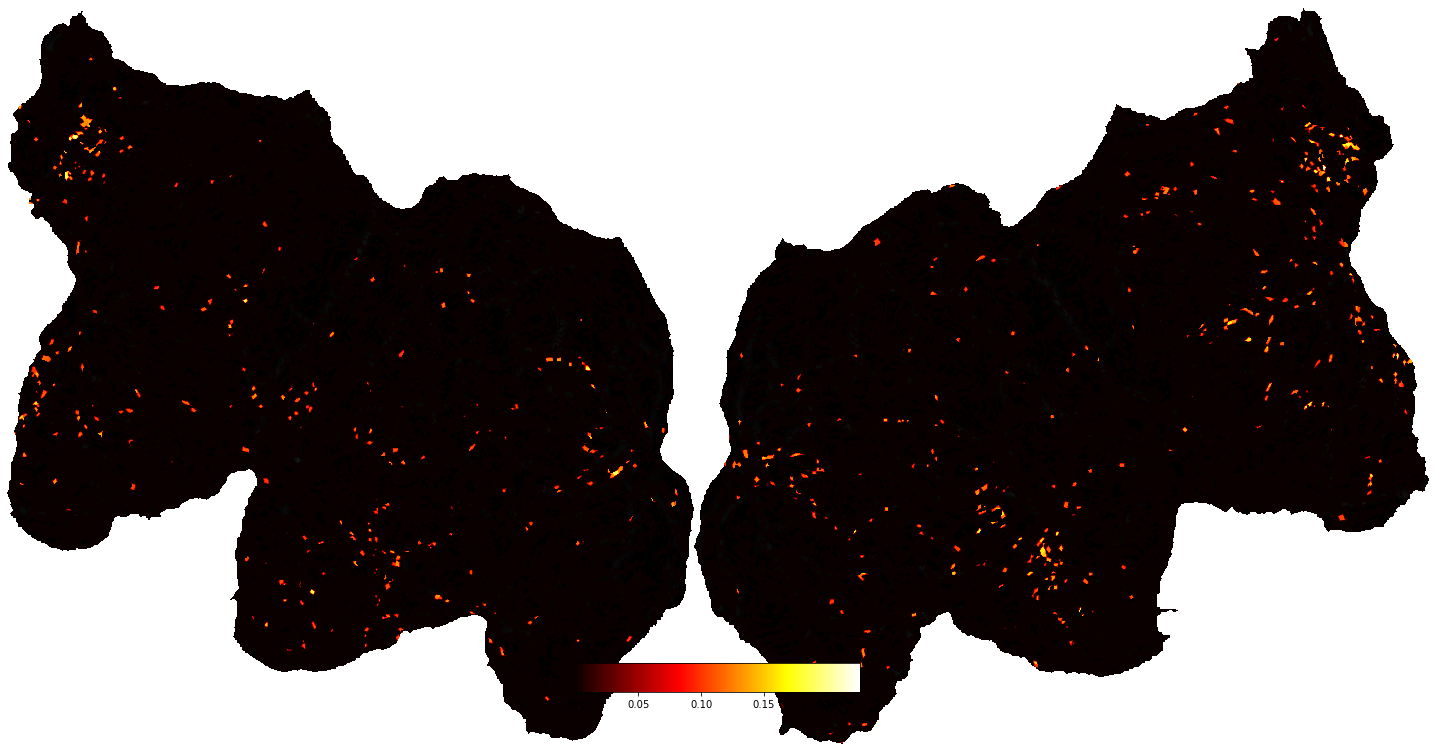

"\n# *** save png\n# set saveFigName\nsaveFigName = '{:s}/time-sentence/{:s}/{:s}_500'.format(savedir, subjectID, movname)\n# make png\ncortex.quickflat.make_png(saveFigName, dv, thick=1,  pixelwise=True, with_colorbar=False, //\n                          with_rois=False, with_curvature=True, curvature_threshold=0, //\n                          curvature_contrast=0.1, curvature_brightness=0)\n#cortex.quickflat.make_png(saveFigName, dv, thick=1,  pixelwise=True, sampler='nearest',//\n                          with_colorbar=False, with_rois=False,  colorbar_location=(.4, .8, .2, .04), //\n                          with_curvature=True, curvature_threshold=0.5, curvature_contrast=0.1, //\n                          curvature_brightness=0.6)\n"

In [22]:
###
### Show 'vol' using pycortex

vol = dt3d 
min_val = 0# min value for colormap
max_val = max(DT)# max value for colormap
print("最大",max(DT))
print("最小",min(DT))
print("平均",np.mean(DT))
#print("標準偏差",np.std(DT))

#print(np.mean(DT)-np.std(DT))
#print(np.mean(DT)+np.std(DT))



### colorbar
dv = cortex.dataset.Volume(vol, subjectName,dataSetName,cmap="hot",vmin=min_val,vmax=max_val)
#dv1 = cortex.dataset.Volume(vol, subjectName,dataSetName,cmap="gist_ncar")
#dv.vmin = 0 # min value for colormap
#dv.vmax = dt3d.max() # max value for colormap

### Show results

# *** show flattened cortical map
_ = cortex.quickflat.make_figure(dv,thick=1,with_colorbar=True,with_rois=False,with_curvature=True,curvature_threshold=0, curvature_contrast=0.1, curvature_brightness=0)
#_ = cortex.quickflat.make_figure(dv, thick=2,  pixelwise=True, sampler='nearest', with_colorbar=True, with_rois=False, colorbar_location=(.4, .8, .2, .04),curvature_brightness=1)



# Show the cortical map
plt.show()

"""
# *** save png
# set saveFigName
saveFigName = '{:s}/time-sentence/{:s}/{:s}_500'.format(savedir, subjectID, movname)
# make png
cortex.quickflat.make_png(saveFigName, dv, thick=1,  pixelwise=True, with_colorbar=False, //
                          with_rois=False, with_curvature=True, curvature_threshold=0, //
                          curvature_contrast=0.1, curvature_brightness=0)
#cortex.quickflat.make_png(saveFigName, dv, thick=1,  pixelwise=True, sampler='nearest',//
                          with_colorbar=False, with_rois=False,  colorbar_location=(.4, .8, .2, .04), //
                          with_curvature=True, curvature_threshold=0.5, curvature_contrast=0.1, //
                          curvature_brightness=0.6)
"""

Value range: 0 - 0.11968129070276776


<ipython-input-6-8454c3b8b57a>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  mappable = ax.pcolor(X, Y, Z, cmap="hot", vmin=min_val, vmax=max_val)


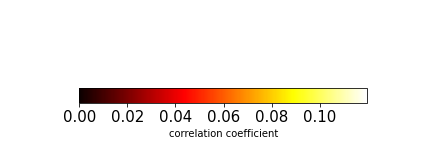

In [6]:
# Output file name of the colorbar
out_name = "ctxmap_colorbar.pdf"
print("Value range: {} - {}".format(min_val, max_val))

x = np.arange(0, 1)
y = np.arange(0, 1)
X, Y = np.meshgrid(x, y)
Z = np.arange(len(x) * len(y)).reshape(len(y), -1)

fig = plt.figure()
ax = fig.add_axes((0, 0, 1, 1/3))

mappable = ax.pcolor(X, Y, Z, cmap="hot", vmin=min_val, vmax=max_val)
ax.set_axis_off()

cbar = fig.colorbar(mappable, ax=ax, orientation="horizontal")
cbar.set_label("correlation coefficient")
cbar.ax.tick_params(axis="x", labelsize=15)

pp = PdfPages(out_name)
pp.savefig(fig, dpi=300, bbox_inches="tight")
pp.close()
